# Datathon 2024: Category A (Champions)

## 1. Preparing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import pandas as pd
import numpy as np

filepath = "./data/catA_train.csv"
data = pd.read_csv(filepath)

FileNotFoundError: [Errno 2] No such file or directory: './data/catA_train.csv'

## 2. Processing Data

In [ ]:
# Drop columns that are not necessary
columns_to_drop = ["LATITUDE", "LONGITUDE", '8-Digit SIC Code', 'Sales (Global Ultimate Total USD)', "AccountID", "Company", "Industry", "8-Digit SIC Description", "Parent Company", "Company Description", "Square Footage", "Company Status (Active/Inactive)", "Import/Export Status", "Fiscal Year End", "Global Ultimate Company", "Domestic Ultimate Company"]
data = data.drop(columns=columns_to_drop)

In [ ]:
# Drop null values for 3 variables

data = data.dropna(subset=["Year Found", "Parent Country", "Global Ultimate Country"])
data.isna().sum()

SIC Code                                   0
Year Found                                 0
Entity Type                                0
Parent Country                             0
Ownership Type                             0
Employees (Single Site)                12019
Employees (Domestic Ultimate Total)       73
Employees (Global Ultimate Total)       2719
Sales (Domestic Ultimate Total USD)        0
Global Ultimate Country                    0
Is Domestic Ultimate                       0
Is Global Ultimate                         0
dtype: int64

In [ ]:
# Categorizing "SIC Code" for One-hot encoding

data['SIC Code'] = pd.to_numeric(data['SIC Code'])

def categorize_industry(sic_code):
    if 100 <= sic_code <= 999:
        return 'Agriculture, Forestry, And Fishing'
    elif 1000 <= sic_code <= 1499:
        return 'Mining'
    elif 1500 <= sic_code <= 1799:
        return 'Construction'
    elif 2000 <= sic_code <= 3999:
        return 'Manufacturing'
    elif 4000 <= sic_code <= 4999:
        return 'Transportation, Communications, Electric, Gas, And Sanitary Services'
    elif 5000 <= sic_code <= 5199:
        return 'Wholesale Trade'
    elif 5200 <= sic_code <= 5999:
        return 'Retail Trade'
    elif 6000 <= sic_code <= 6799:
        return 'Finance, Insurance, And Real Estate'
    elif 7000 <= sic_code <= 8999:
        return 'Services'
    elif 9000 <= sic_code <= 9999:
        return 'Public Administration'
    else:
        return 'Other'  # Handle cases not covered by the specified ranges

# Apply the categorization function to create a new 'Industry' column
data['Industry'] = data['SIC Code'].apply(categorize_industry)

data.drop('SIC Code', axis=1, inplace=True)
data


,Year Found,Entity Type,Parent Country,Ownership Type,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Global Ultimate Country,Is Domestic Ultimate,Is Global Ultimate,Industry
0,2020.0,Subsidiary,Singapore,Private,15.0,25.0,NaN,2.209224e+06,United Kingdom,0.0,0.0,Services
1,2015.0,Subsidiary,Singapore,Private,39.0,100.0,100.0,7.093536e+09,Singapore,0.0,0.0,"Transportation, Communications, Electric, Gas,..."
2,1993.0,Subsidiary,Hong Kong SAR,Private,4.0,4.0,4.0,1.026308e+06,Hong Kong SAR,1.0,0.0,"Finance, Insurance, And Real Estate"
3,2006.0,Subsidiary,Singapore,Private,10.0,100.0,100.0,7.339898e+10,Singapore,0.0,0.0,"Finance, Insurance, And Real Estate"
4,2006.0,Parent,Singapore,Private,NaN,4.0,4.0,4.322130e+05,Singapore,1.0,1.0,"Finance, Insurance, And Real Estate"
...,...,...,...,...,...,...,...,...,...,...,...,...
29176,1996.0,Subsidiary,Japan,Private,100.0,100.0,4556.0,6.344614e+06,Japan,1.0,0.0,Construction
29177,2009.0,Subsidiary,Hong Kong SAR,Private,NaN,50.0,6615.0,2.949122e+06,China,1.0,0.0,"Finance, Insurance, And Real Estate"
29179,1991.0,Subsidiary,United Kingdom,Public,NaN,5.0,NaN,2.289731e+08,United Kingdom,1.0,0.0,"Finance, Insurance, And Real Estate"
29180,2018.0,Subsidiary,Singapore,Private,10.0,4.0,4.0,1.026308e+06,Singapore,0.0,0.0,"Finance, Insurance, And Real Estate"


In [ ]:
# One-Hot Encoding for "Industry"

industry_frequency = data["Industry"].value_counts()

industry_dummies = pd.get_dummies(data["Industry"])
merged_data1 = pd.concat([data, industry_dummies], axis='columns')
data = merged_data1.drop(['Industry'], axis='columns')
data

In [ ]:
# One-Hot Encoding for "Entity Type"

entity_frequency = data["Entity Type"].value_counts()
# 4 categories: "Branch", "Independent", "Parent", "Subsidiary"
entity_dummies = pd.get_dummies(data["Entity Type"])
merged_data1 = pd.concat([data, entity_dummies], axis='columns')
data = merged_data1.drop(['Entity Type'], axis='columns')
data

,Year Found,Parent Country,Ownership Type,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Global Ultimate Country,Is Domestic Ultimate,Is Global Ultimate,...,Mining,Public Administration,Retail Trade,Services,"Transportation, Communications, Electric, Gas, And Sanitary Services",Wholesale Trade,Branch,Independent,Parent,Subsidiary
0,2020.0,Singapore,Private,15.0,25.0,NaN,2.209224e+06,United Kingdom,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
1,2015.0,Singapore,Private,39.0,100.0,100.0,7.093536e+09,Singapore,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
2,1993.0,Hong Kong SAR,Private,4.0,4.0,4.0,1.026308e+06,Hong Kong SAR,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,2006.0,Singapore,Private,10.0,100.0,100.0,7.339898e+10,Singapore,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,2006.0,Singapore,Private,NaN,4.0,4.0,4.322130e+05,Singapore,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29176,1996.0,Japan,Private,100.0,100.0,4556.0,6.344614e+06,Japan,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
29177,2009.0,Hong Kong SAR,Private,NaN,50.0,6615.0,2.949122e+06,China,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
29179,1991.0,United Kingdom,Public,NaN,5.0,NaN,2.289731e+08,United Kingdom,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
29180,2018.0,Singapore,Private,10.0,4.0,4.0,1.026308e+06,Singapore,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# One-Hot Encoding for "Ownership Type"

ownership_frequency = data["Ownership Type"].value_counts()
ownership_frequency # 6 categories: "Private", "Public", "Partnership", "Public Sector", "Non-Corporates", "Nonprofit"
ownership_dummies = pd.get_dummies(data["Ownership Type"])
merged_data2 = pd.concat([data, ownership_dummies], axis='columns')
data = merged_data2.drop(['Ownership Type'], axis='columns')

data

,Year Found,Parent Country,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Global Ultimate Country,Is Domestic Ultimate,Is Global Ultimate,"Agriculture, Forestry, And Fishing",...,Branch,Independent,Parent,Subsidiary,Non-Corporates,Nonprofit,Partnership,Private,Public,Public Sector
0,2020.0,Singapore,15.0,25.0,NaN,2.209224e+06,United Kingdom,0.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
1,2015.0,Singapore,39.0,100.0,100.0,7.093536e+09,Singapore,0.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
2,1993.0,Hong Kong SAR,4.0,4.0,4.0,1.026308e+06,Hong Kong SAR,1.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
3,2006.0,Singapore,10.0,100.0,100.0,7.339898e+10,Singapore,0.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
4,2006.0,Singapore,NaN,4.0,4.0,4.322130e+05,Singapore,1.0,1.0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29176,1996.0,Japan,100.0,100.0,4556.0,6.344614e+06,Japan,1.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
29177,2009.0,Hong Kong SAR,NaN,50.0,6615.0,2.949122e+06,China,1.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0
29179,1991.0,United Kingdom,NaN,5.0,NaN,2.289731e+08,United Kingdom,1.0,0.0,0,...,0,0,0,1,0,0,0,0,1,0
29180,2018.0,Singapore,10.0,4.0,4.0,1.026308e+06,Singapore,0.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
# Target Encoding for "Parent Country"

col_name = ['Parent Country', 'Sales (Domestic Ultimate Total USD)']
selected_ds = data[col_name]
encodings = selected_ds.groupby('Parent Country')['Sales (Domestic Ultimate Total USD)'].mean().reset_index()
data = data.merge(encodings, how='left', on='Parent Country')
data.drop('Parent Country', axis=1, inplace=True)
data

,Year Found,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD)_x,Global Ultimate Country,Is Domestic Ultimate,Is Global Ultimate,"Agriculture, Forestry, And Fishing",Construction,...,Independent,Parent,Subsidiary,Non-Corporates,Nonprofit,Partnership,Private,Public,Public Sector,Sales (Domestic Ultimate Total USD)_y
0,2020.0,15.0,25.0,NaN,2.209224e+06,United Kingdom,0.0,0.0,0,0,...,0,0,1,0,0,0,1,0,0,8.148691e+08
1,2015.0,39.0,100.0,100.0,7.093536e+09,Singapore,0.0,0.0,0,0,...,0,0,1,0,0,0,1,0,0,8.148691e+08
2,1993.0,4.0,4.0,4.0,1.026308e+06,Hong Kong SAR,1.0,0.0,0,0,...,0,0,1,0,0,0,1,0,0,3.063036e+08
3,2006.0,10.0,100.0,100.0,7.339898e+10,Singapore,0.0,0.0,0,0,...,0,0,1,0,0,0,1,0,0,8.148691e+08
4,2006.0,NaN,4.0,4.0,4.322130e+05,Singapore,1.0,1.0,0,0,...,0,1,0,0,0,0,1,0,0,8.148691e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28229,1996.0,100.0,100.0,4556.0,6.344614e+06,Japan,1.0,0.0,0,1,...,0,0,1,0,0,0,1,0,0,1.862069e+08
28230,2009.0,NaN,50.0,6615.0,2.949122e+06,China,1.0,0.0,0,0,...,0,0,1,0,0,0,1,0,0,3.063036e+08
28231,1991.0,NaN,5.0,NaN,2.289731e+08,United Kingdom,1.0,0.0,0,0,...,0,0,1,0,0,0,0,1,0,1.412880e+08
28232,2018.0,10.0,4.0,4.0,1.026308e+06,Singapore,0.0,0.0,0,0,...,0,0,1,0,0,0,1,0,0,8.148691e+08


In [ ]:
# Target Encoding for "Global Ultimate Country"

col_name = ['Global Ultimate Country', 'Sales (Domestic Ultimate Total USD)_x']
selected_ds = data[col_name]
encodings = selected_ds.groupby('Global Ultimate Country')['Sales (Domestic Ultimate Total USD)_x'].mean().reset_index()
data = data.merge(encodings, how='left', on='Global Ultimate Country')
data.drop('Global Ultimate Country', axis=1, inplace=True)
data

,Year Found,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD)_x_x,Is Domestic Ultimate,Is Global Ultimate,"Agriculture, Forestry, And Fishing",Construction,"Finance, Insurance, And Real Estate",...,Parent,Subsidiary,Non-Corporates,Nonprofit,Partnership,Private,Public,Public Sector,Sales (Domestic Ultimate Total USD)_y,Sales (Domestic Ultimate Total USD)_x_y
0,2020.0,15.0,25.0,NaN,2.209224e+06,0.0,0.0,0,0,0,...,0,1,0,0,0,1,0,0,8.148691e+08,4.684677e+08
1,2015.0,39.0,100.0,100.0,7.093536e+09,0.0,0.0,0,0,0,...,0,1,0,0,0,1,0,0,8.148691e+08,5.614197e+08
2,1993.0,4.0,4.0,4.0,1.026308e+06,1.0,0.0,0,0,1,...,0,1,0,0,0,1,0,0,3.063036e+08,1.081525e+08
3,2006.0,10.0,100.0,100.0,7.339898e+10,0.0,0.0,0,0,1,...,0,1,0,0,0,1,0,0,8.148691e+08,5.614197e+08
4,2006.0,NaN,4.0,4.0,4.322130e+05,1.0,1.0,0,0,1,...,1,0,0,0,0,1,0,0,8.148691e+08,5.614197e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28229,1996.0,100.0,100.0,4556.0,6.344614e+06,1.0,0.0,0,1,0,...,0,1,0,0,0,1,0,0,1.862069e+08,2.383841e+08
28230,2009.0,NaN,50.0,6615.0,2.949122e+06,1.0,0.0,0,0,1,...,0,1,0,0,0,1,0,0,3.063036e+08,1.730675e+09
28231,1991.0,NaN,5.0,NaN,2.289731e+08,1.0,0.0,0,0,1,...,0,1,0,0,0,0,1,0,1.412880e+08,4.684677e+08
28232,2018.0,10.0,4.0,4.0,1.026308e+06,0.0,0.0,0,0,1,...,0,1,0,0,0,1,0,0,8.148691e+08,5.614197e+08


In [ ]:
# Rename the columns created by target encoding

data.rename (columns = {'Sales (Domestic Ultimate Total USD)_y': 'Parent Country'}, inplace=True)
data.rename (columns = {'Sales (Domestic Ultimate Total USD)_x_y': 'Global Ultimate Country'}, inplace=True)
data.rename (columns = {'Sales (Domestic Ultimate Total USD)_x_x': 'Sales (Domestic Ultimate Total USD)'}, inplace=True)

data

,Year Found,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate,"Agriculture, Forestry, And Fishing",Construction,"Finance, Insurance, And Real Estate",...,Parent,Subsidiary,Non-Corporates,Nonprofit,Partnership,Private,Public,Public Sector,Parent Country,Global Ultimate Country
0,2020.0,15.0,25.0,NaN,2.209224e+06,0.0,0.0,0,0,0,...,0,1,0,0,0,1,0,0,8.148691e+08,4.684677e+08
1,2015.0,39.0,100.0,100.0,7.093536e+09,0.0,0.0,0,0,0,...,0,1,0,0,0,1,0,0,8.148691e+08,5.614197e+08
2,1993.0,4.0,4.0,4.0,1.026308e+06,1.0,0.0,0,0,1,...,0,1,0,0,0,1,0,0,3.063036e+08,1.081525e+08
3,2006.0,10.0,100.0,100.0,7.339898e+10,0.0,0.0,0,0,1,...,0,1,0,0,0,1,0,0,8.148691e+08,5.614197e+08
4,2006.0,NaN,4.0,4.0,4.322130e+05,1.0,1.0,0,0,1,...,1,0,0,0,0,1,0,0,8.148691e+08,5.614197e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28229,1996.0,100.0,100.0,4556.0,6.344614e+06,1.0,0.0,0,1,0,...,0,1,0,0,0,1,0,0,1.862069e+08,2.383841e+08
28230,2009.0,NaN,50.0,6615.0,2.949122e+06,1.0,0.0,0,0,1,...,0,1,0,0,0,1,0,0,3.063036e+08,1.730675e+09
28231,1991.0,NaN,5.0,NaN,2.289731e+08,1.0,0.0,0,0,1,...,0,1,0,0,0,0,1,0,1.412880e+08,4.684677e+08
28232,2018.0,10.0,4.0,4.0,1.026308e+06,0.0,0.0,0,0,1,...,0,1,0,0,0,1,0,0,8.148691e+08,5.614197e+08


In [ ]:
# Predicting missing values using Bayesian Linear Regression (Regression Imputation)

import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

missing_col = ['Employees (Single Site)', 'Employees (Domestic Ultimate Total)', 'Employees (Global Ultimate Total)']
predic_col = ['Year Found', 'Sales (Domestic Ultimate Total USD)', 'Is Domestic Ultimate', 'Is Global Ultimate', 'Branch', 'Independent','Parent', 'Subsidiary', 'Non-Corporates', 'Nonprofit', 'Partnership', 'Private', 'Public', 'Public Sector', 'Agriculture, Forestry, And Fishing',
       'Construction', 'Finance, Insurance, And Real Estate', 'Manufacturing',
       'Mining', 'Public Administration', 'Retail Trade', 'Services',
       'Transportation, Communications, Electric, Gas, And Sanitary Services',
       'Wholesale Trade', 'Parent Country',
       'Global Ultimate Country']

imputer = IterativeImputer(estimator=BayesianRidge())
imputed_data = imputer.fit_transform(data[predic_col + missing_col])
data[missing_col] = imputed_data[:, -len(missing_col):]

data.isna().sum()

Year Found                                                              0
Employees (Single Site)                                                 0
Employees (Domestic Ultimate Total)                                     0
Employees (Global Ultimate Total)                                       0
Sales (Domestic Ultimate Total USD)                                     0
Is Domestic Ultimate                                                    0
Is Global Ultimate                                                      0
Agriculture, Forestry, And Fishing                                      0
Construction                                                            0
Finance, Insurance, And Real Estate                                     0
Manufacturing                                                           0
Mining                                                                  0
Public Administration                                                   0
Retail Trade                          

## 3. Exploratory Data Analysis (EDA)

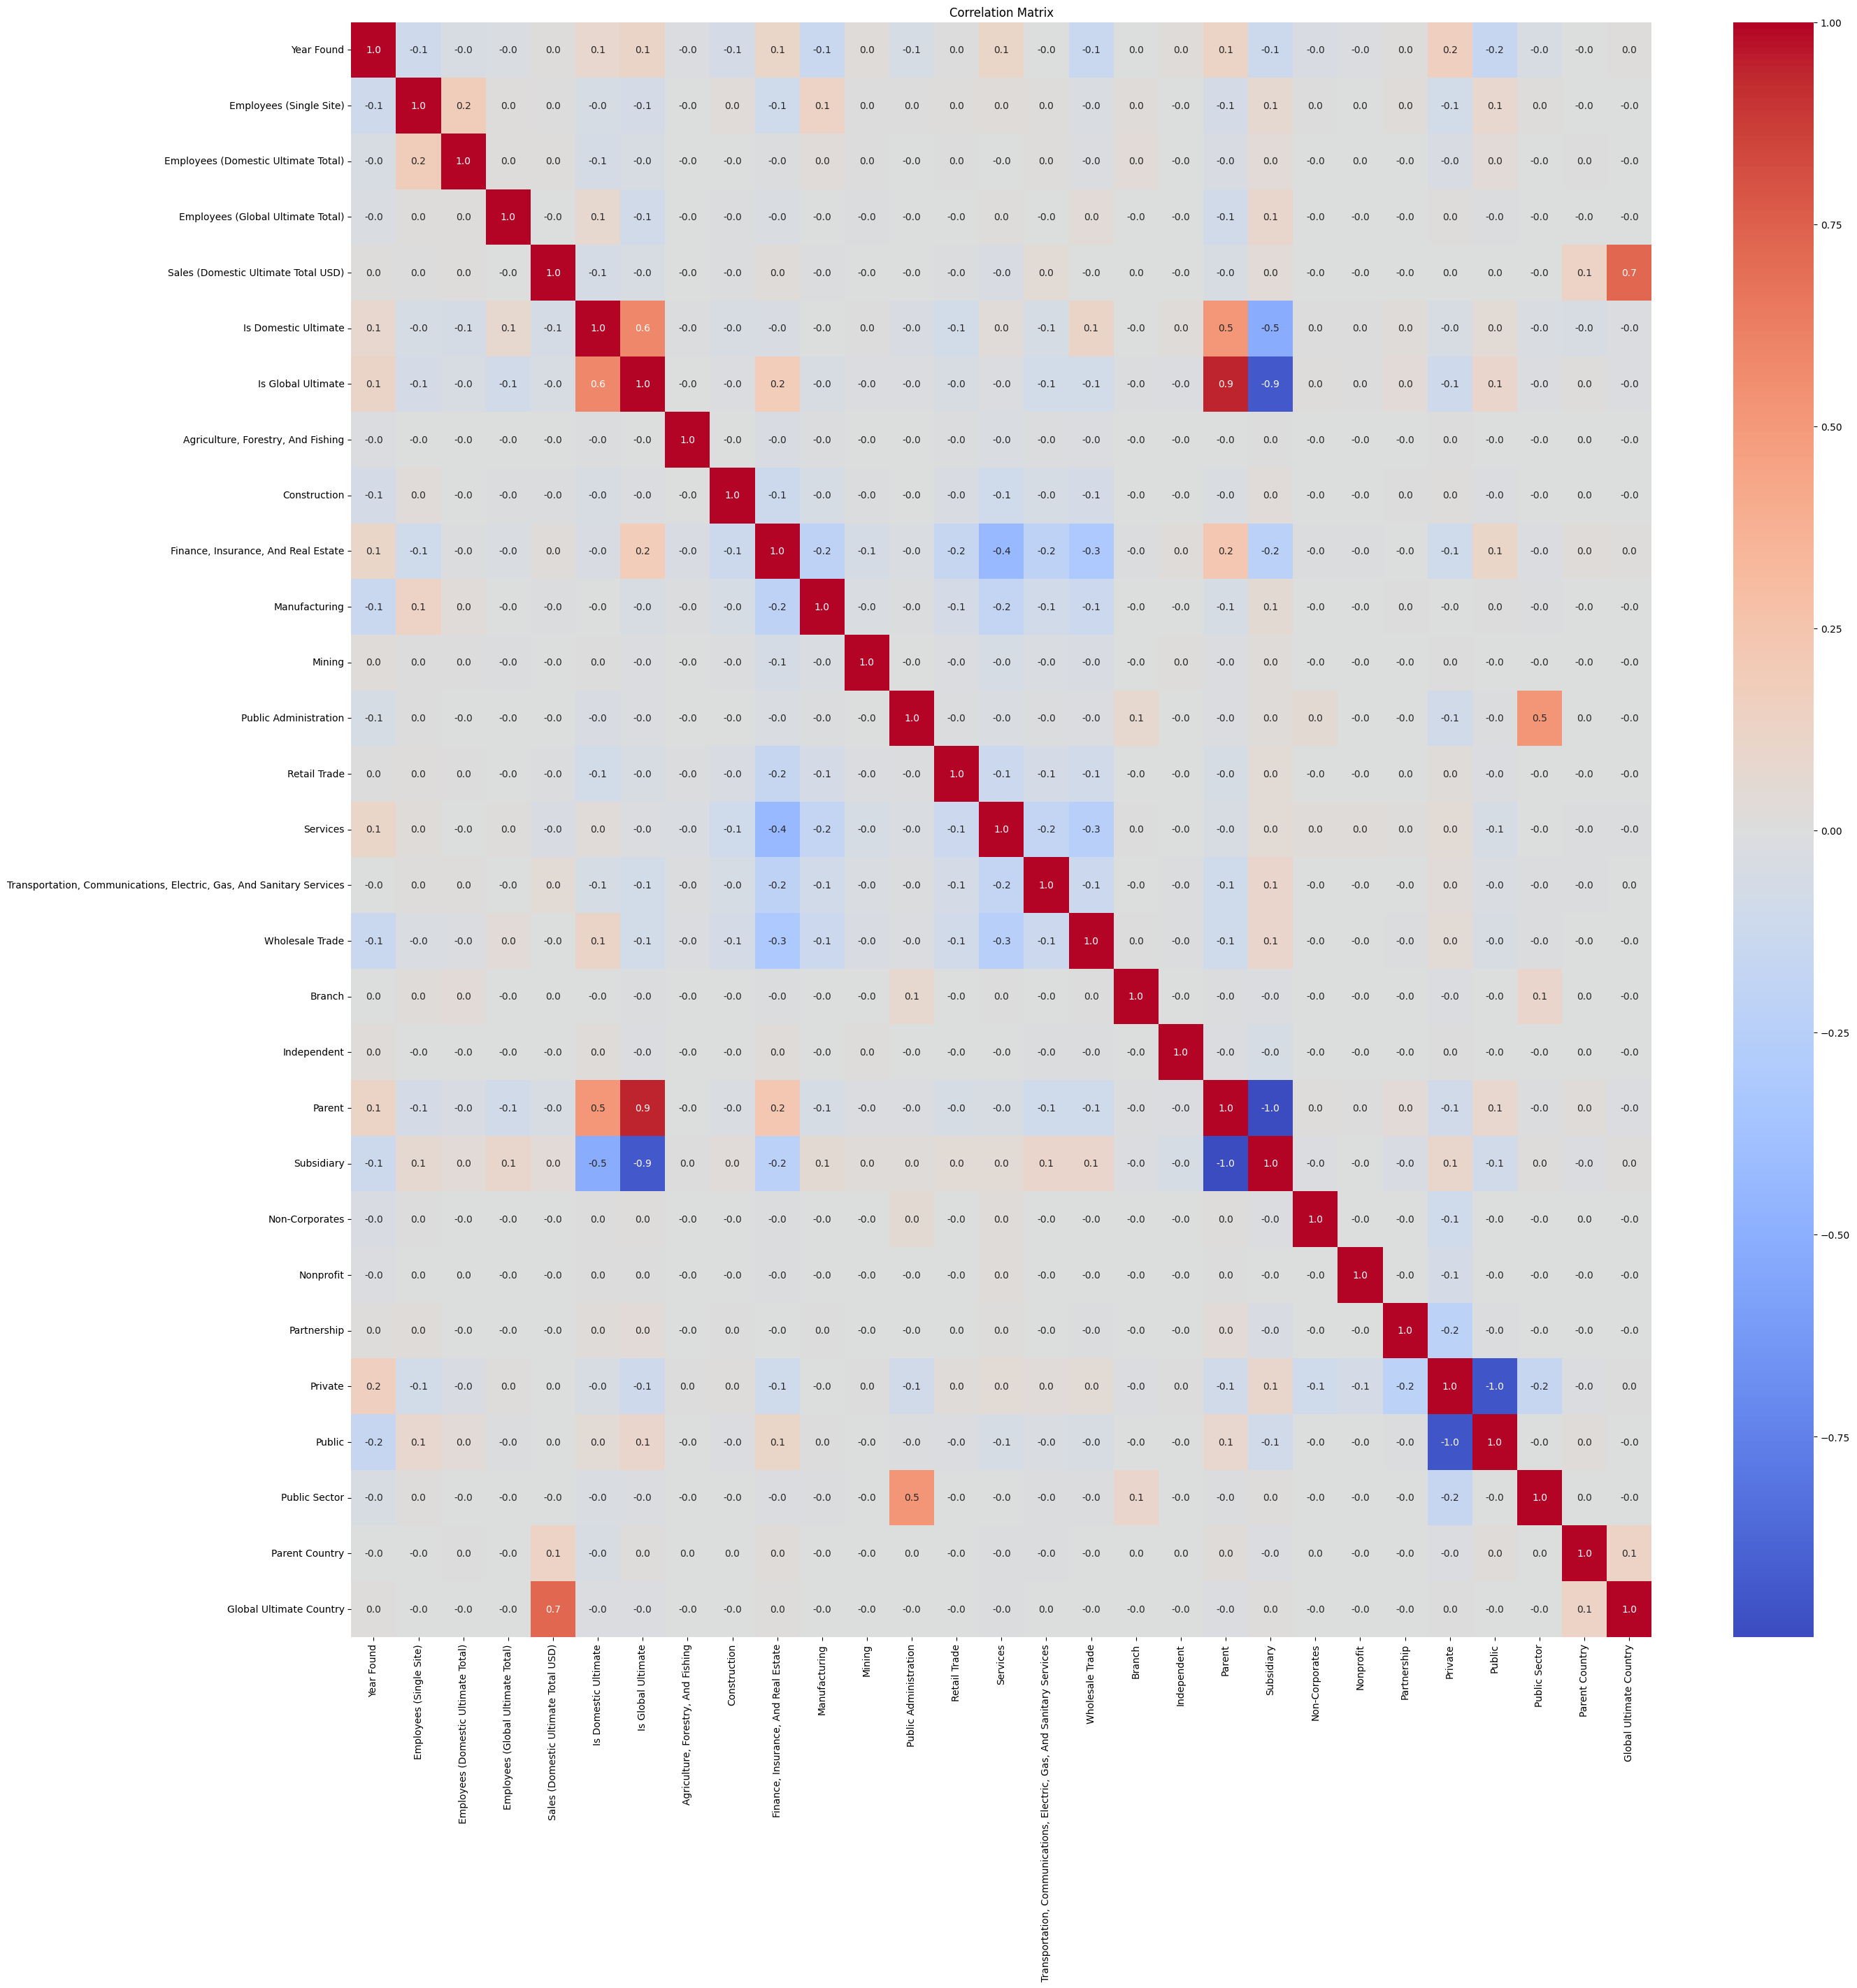

In [ ]:
# Data Visualization using correlation heatmap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))

corr_matrix = data.corr()
heatmap = sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".1f")
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title("Correlation Heatmap")
plt.show()

# 0.9 -- "Is Global Ultimate" = "Parent", "Subsidary"

In [ ]:
# Feature Scaling - Normalizarion

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data

,Year Found,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate,"Agriculture, Forestry, And Fishing",Construction,"Finance, Insurance, And Real Estate",...,Parent,Subsidiary,Non-Corporates,Nonprofit,Partnership,Private,Public,Public Sector,Parent Country,Global Ultimate Country
0,0.985294,0.004571,0.000300,0.003154,0.000479,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.012791,0.002278
1,0.960784,0.006564,0.001238,0.000045,0.022734,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.012791,0.002730
2,0.852941,0.003657,0.000038,0.000001,0.000475,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.004806,0.000525
3,0.916667,0.004155,0.001238,0.000045,0.230832,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.012791,0.002730
4,0.916667,0.003509,0.000038,0.000001,0.000473,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.012791,0.002730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28229,0.867647,0.011630,0.001238,0.002080,0.000492,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.002921,0.001159
28230,0.931373,0.004241,0.000613,0.003020,0.000481,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.004806,0.008419
28231,0.843137,0.009784,0.000050,0.003147,0.001190,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.002216,0.002278
28232,0.975490,0.004155,0.000038,0.000001,0.000475,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.012791,0.002730


## 4. Feature Selection

In [ ]:
# Feature Selection

correlation_matrix = data.corr()

target_feature = 'Sales (Domestic Ultimate Total USD)'

correlation_with_target = correlation_matrix[target_feature]
sorted_correlations = correlation_with_target.abs().sort_values(ascending=False)
sorted_correlations = sorted_correlations.drop(target_feature)

print("Features in Descending Order of Correlation:\n", sorted_correlations)
print("Top 10 Features:\n", sorted_correlations[:10])


Features in Descending Order of Correlation:
 Global Ultimate Country                                                 0.725788
Parent Country                                                          0.127216
Is Domestic Ultimate                                                    0.056515
Transportation, Communications, Electric, Gas, And Sanitary Services    0.047409
Is Global Ultimate                                                      0.040201
Subsidiary                                                              0.038416
Parent                                                                  0.038329
Services                                                                0.032597
Finance, Insurance, And Real Estate                                     0.022524
Employees (Domestic Ultimate Total)                                     0.016036
Year Found                                                              0.015215
Retail Trade                                                   

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#X = data[[ 'Is Domestic Ultimate', 'Is Global Ultimate', 'Transportation, Communications, Electric, Gas, And Sanitary Services', 'Parent', 'Subsidiary', 'Services', 'Global_Ultimate_Country_Is_Singapore', 'Finance, Insurance, And Real Estate', 'Employees (Domestic Ultimate Total)', 'Year Found']]
X = data[['Global Ultimate Country', 'Parent Country', 'Is Domestic Ultimate', 'Transportation, Communications, Electric, Gas, And Sanitary Services', 'Is Global Ultimate', 'Services', 'Finance, Insurance, And Real Estate', 'Employees (Domestic Ultimate Total)', 'Year Found', 'Retail Trade', 'Manufacturing']]
y = data[['Sales (Domestic Ultimate Total USD)']]

# Only features that have the correlation above 0.01
# 0.9 -- "Is Global Ultimate" = "Parent", "Subsidary"
# 0.7 -- "Global Ultimate Country"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 5. Model Training and **Evaluation**

### 5.1. Random Forest Regressor

<ipython-input-26-19eeade63c25>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Mean Squared Error: 0.00029565817572620336
R-squared: 0.8133171951614133


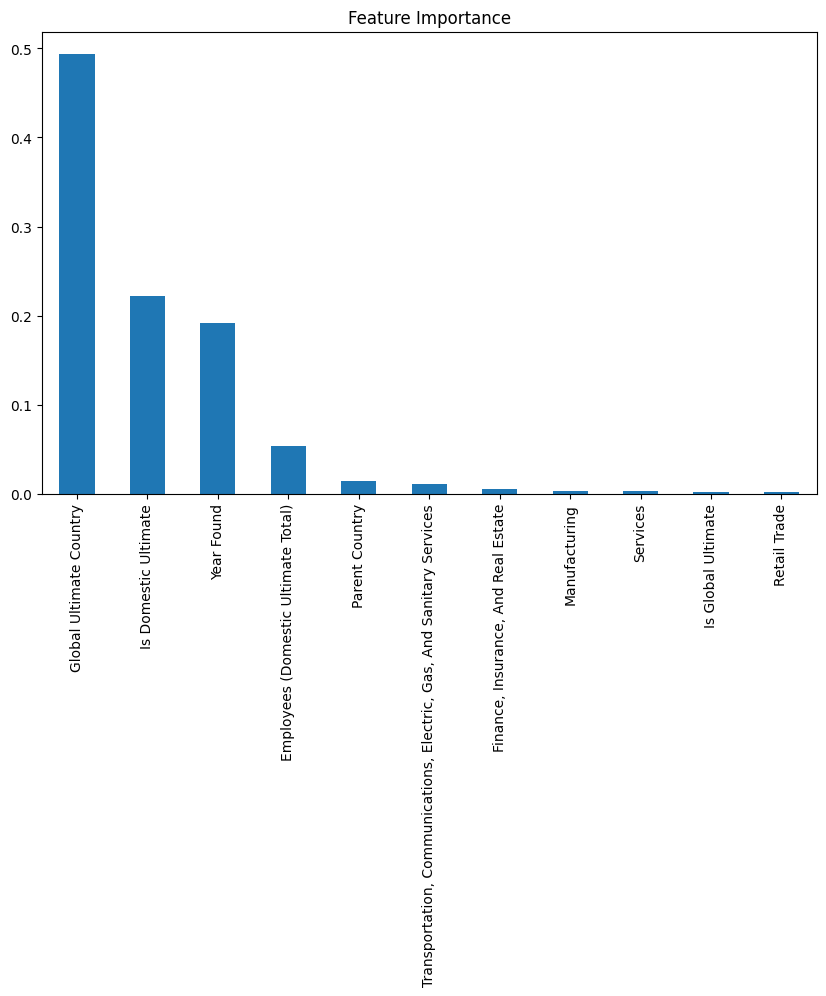

In [ ]:
# Random Forest Regressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

In [ ]:
# Cross Validation - Random Forest Regressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import statsmodels.api as sm

# Feature columns
X = data[['Global Ultimate Country', 'Parent Country', 'Is Domestic Ultimate', 'Transportation, Communications, Electric, Gas, And Sanitary Services', 'Is Global Ultimate', 'Services', 'Finance, Insurance, And Real Estate', 'Employees (Domestic Ultimate Total)', 'Year Found', 'Retail Trade', 'Manufacturing']]

# Target column
y = data['Sales (Domestic Ultimate Total USD)']

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross-validation with k-fold (k=10)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Custom scoring functions
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Store metrics for each fold
r2_scores = []
adj_r2_scores = []
aic_bic_scores = []
mse_scores = []
mae_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit RandomForestRegressor
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    # Calculate R² and adjusted R²
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

    # Calculate AIC/BIC using statsmodels
    X_train_sm = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train_sm).fit()
    aic_bic = model.aic, model.bic

    # Calculate MSE and MAE
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Store metrics for each fold
    r2_scores.append(r2)
    adj_r2_scores.append(adj_r2)
    aic_bic_scores.append(aic_bic)
    mse_scores.append(mse)
    mae_scores.append(mae)

# Display results
print(f"Average R²: {np.mean(r2_scores)}")
print(f"Average Adj R²: {np.mean(adj_r2_scores)}")
print(f"Average AIC/BIC: {np.mean(aic_bic_scores, axis=0)}")
print(f"Average MSE: {np.mean(mse_scores)}")
print(f"Average MAE: {np.mean(mae_scores)}")


Average R²: 0.653935585414013
Average Adj R²: 0.6525815336221232
Average AIC/BIC: [-121410.88555853 -121313.17049827]
Average MSE: 0.0002741978442312589
Average MAE: 0.0022061329493998877


### Gradient Boosting Regressor

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.00033216551873281185
R-squared: 0.7902659361426558


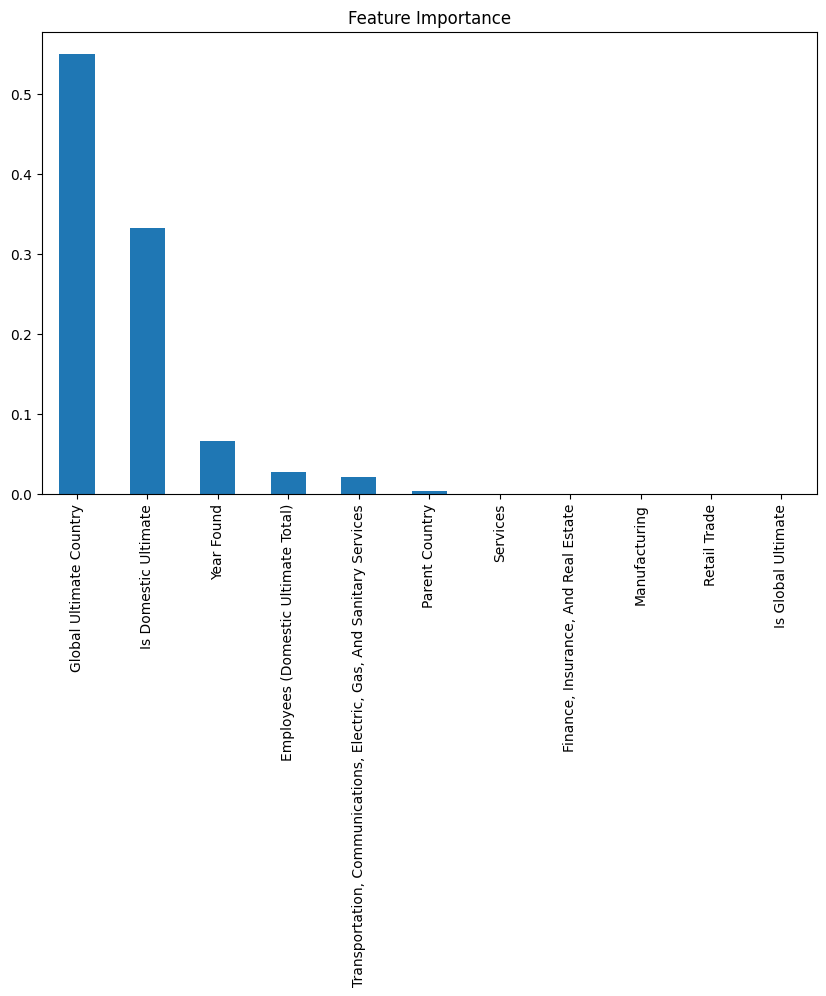

In [ ]:
# Gradient Boosting Regressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

gbm_model.fit(X_train, y_train)

y_pred = gbm_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature importance
feature_importances = pd.Series(gbm_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

In [ ]:
# Cross Validation - Gradient Boosting Regressor

from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import statsmodels.api as sm

# Assuming 'data' is your DataFrame
# Replace 'Sales (Domestic Ultimate Total USD)' with the actual target column name

# Feature columns
X = data[['Global Ultimate Country', 'Parent Country', 'Is Domestic Ultimate', 'Transportation, Communications, Electric, Gas, And Sanitary Services', 'Is Global Ultimate', 'Subsidiary', 'Parent', 'Services', 'Finance, Insurance, And Real Estate', 'Employees (Domestic Ultimate Total)']]

# Target column
y = data['Sales (Domestic Ultimate Total USD)']

# Gradient Boosting Regressor
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Cross-validation with k-fold (k=10)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Custom scoring functions
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Store metrics for each fold
r2_scores = []
adj_r2_scores = []
aic_bic_scores = []
mse_scores = []
mae_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit GradientBoostingRegressor
    gbm_model.fit(X_train, y_train)
    y_pred = gbm_model.predict(X_test)

    # Calculate R² and adjusted R²
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

    # Calculate AIC/BIC using statsmodels
    X_train_sm = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train_sm).fit()
    aic_bic = model.aic, model.bic

    # Calculate MSE and MAE
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Store metrics for each fold
    r2_scores.append(r2)
    adj_r2_scores.append(adj_r2)
    aic_bic_scores.append(aic_bic)
    mse_scores.append(mse)
    mae_scores.append(mae)

# Display results
print(f"Average R²: {np.mean(r2_scores)}")
print(f"Average Adj R²: {np.mean(adj_r2_scores)}")
print(f"Average AIC/BIC: {np.mean(aic_bic_scores, axis=0)}")
print(f"Average MSE: {np.mean(mse_scores)}")
print(f"Average MAE: {np.mean(mae_scores)}")

Average R²: 0.6545231359186174
Average Adj R²: 0.6532946881275005
Average AIC/BIC: [-121394.2744017  -121304.70226313]
Average MSE: 0.0002591693695117196
Average MAE: 0.0023066648290444055


# Random Forest Regressor

* Average R²: 0.653935585414013
* Average Adj R²: 0.6525815336221232
* Average AIC/BIC: [-121410.88555853 -121313.17049827]
* Average MSE: 0.0002741978442312589
* Average MAE: 0.0022061329493998877


# Gradient Boosting Regressor
* Average R²: 0.6545231359186174
* Average Adj R²: 0.6532946881275005
* Average AIC/BIC: [-121394.2744017  -121304.70226313]
* Average MSE: 0.0002591693695117196
* Average MAE: 0.0023066648290444055